<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/Tensorflow-2-and-Keras-Deep-Learning/blob/main/05_Keras_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

In [3]:
# (X_train,y_train),(X_test,y_test)=cifar100.load_data()

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

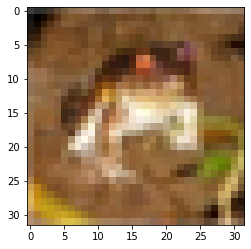

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout


In [17]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add((Dense(10,activation='softmax')))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])



In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        65600     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stoping=EarlyStopping(monitor='accuracy',patience=2,verbose=1,mode='max')

In [21]:
model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),callbacks=[early_stoping])

Epoch 1/25
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5143 - accuracy: 0.4475 - val_loss: 1.2626 - val_accuracy: 0.5526
Epoch 2/25
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1093 - accuracy: 0.6074 - val_loss: 0.9975 - val_accuracy: 0.6531
Epoch 3/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9441 - accuracy: 0.6695 - val_loss: 0.9117 - val_accuracy: 0.6889
Epoch 4/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8302 - accuracy: 0.7100 - val_loss: 0.9114 - val_accuracy: 0.6841
Epoch 5/25
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7355 - accuracy: 0.7423 - val_loss: 0.8984 - val_accuracy: 0.6893
Epoch 6/25
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6566 - accuracy: 0.7699 - val_loss: 0.8593 - val_accuracy: 0.7067
Epoch 7/25
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5903 - accuracy: 0.7927 - val_loss: 0.8988 -

In [23]:
metrics=pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.514303,0.44746,1.262598,0.5526
1,1.109321,0.60744,0.997472,0.6531
2,0.944146,0.66948,0.911698,0.6889
3,0.830171,0.71000,0.911446,0.6841
4,0.735543,0.74234,0.898380,0.6893
5,0.656628,0.76990,0.859308,0.7067
6,0.590283,0.79274,0.898805,0.7093
7,0.529325,0.81272,0.934817,0.7018
8,0.479989,0.82972,0.931200,0.7051
9,0.436006,0.84710,0.966525,0.7164


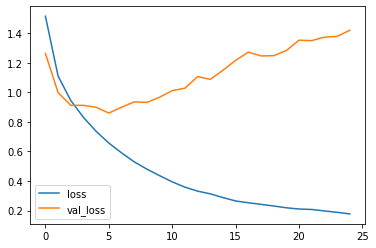

In [27]:
metrics[['loss','val_loss']].plot()

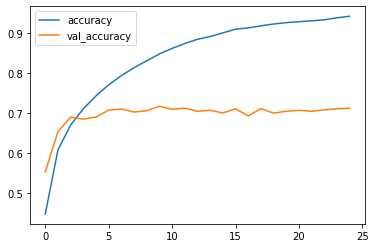

In [28]:
metrics[['accuracy','val_accuracy']].plot()

In [44]:
y_pred=(model.predict(X_test)>0.5)*1

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1000
           1       0.85      0.81      0.83      1000
           2       0.64      0.60      0.62      1000
           3       0.58      0.43      0.49      1000
           4       0.69      0.61      0.65      1000
           5       0.62      0.60      0.61      1000
           6       0.75      0.79      0.77      1000
           7       0.79      0.75      0.77      1000
           8       0.81      0.85      0.83      1000
           9       0.80      0.80      0.80      1000

   micro avg       0.73      0.70      0.72     10000
   macro avg       0.73      0.70      0.71     10000
weighted avg       0.73      0.70      0.71     10000
 samples avg       0.70      0.70      0.70     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
import seaborn as sns

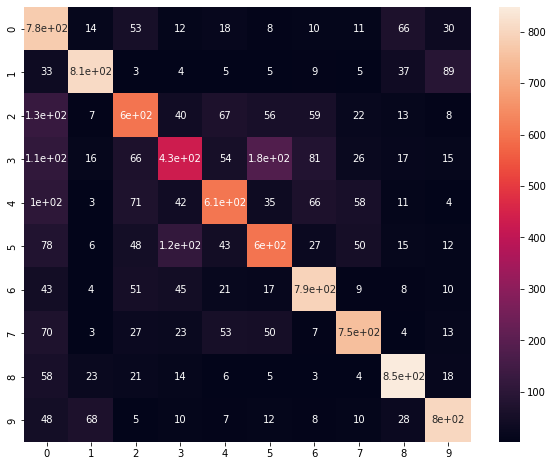

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)),annot=True)